In [1]:
# Weihao Liu
import sys # modules in sys.path directories's are all available for import
sys.path.append('./DevelopedMethods')
from preprocessing import * # import our pre-processed dataset + imports.py (np, pd, df, df_train, X_train_balanced etc.)

In [5]:
#Instantiating LogisticRegressionClassifier object
ccfd_logisticregression = linear_model.LogisticRegression(random_state = 7)

#Training the model
ccfd_logisticregression.fit(X_train_balanced,  y_train_balanced)

#Using newly trained model with X_test_balanced to predict for Credit Card Fraud
logisticregression_prediction = ccfd_logisticregression.predict(X_test_balanced)

#Evaluating accuracy of model by comparing predicted labels with y_test values (actual)
score_lr = metrics.accuracy_score(y_test_balanced, logisticregression_prediction)

#Displaying final accuracy score
"Accuracy Score: ", score_lr

('Accuracy Score: ', 0.9691218266775856)

# ROC / AUC

Area Under Curve: 
0.9739202148054873


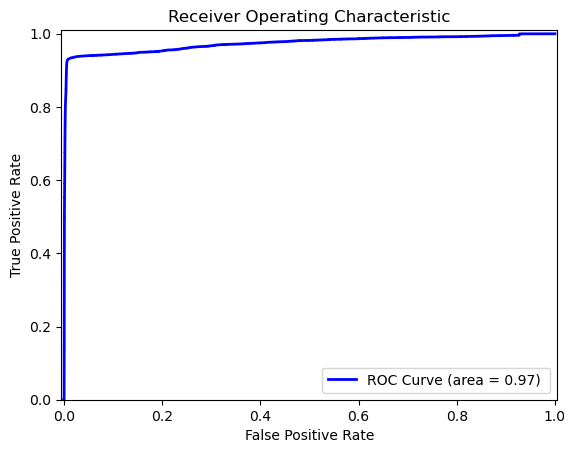

In [7]:
#Estimating the probability of Credit Card Fraud Label
logisticregression_prediction_probability = ccfd_logisticregression.predict_proba(X_test_balanced)

#Calculating true positive rate(tpr) and false positive rate(fpr)
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve(y_test_balanced, logisticregression_prediction_probability[:,1], pos_label=1)

#Calculating Area Under Curve
lr_AUC = metrics.auc(lr_fpr, lr_tpr)
print("Area Under Curve: ", lr_AUC)

#Plotting graph for ROC Curve
plt.figure()
plt.plot(lr_fpr, lr_tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f) ' % lr_AUC)

#Defining range of x and y axes
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Defining labels, title and legend for graph
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right');

# Feature importance Analysis Logistic Regression
Similar to Linear Regression, feature importance is determined by the magnitude of the coefficients.
Standardize features for meaningful comparison.
You can also calculate the odds ratios:
OddsÂ Ratio = e^coefficient
 
```# Access coefficients and compute odds ratios
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logistic_model.coef_[0],
    'Odds_Ratio': np.exp(logistic_model.coef_[0])
}).sort_values(by='Coefficient', key=abs, ascending=False)``

# PCA (Principal Component Analysis) - an unsupervised dimensionality reduction

In [13]:
pca = PCA(n_components = 10)
X_Train_pca = pca.fit_transform(X_train_balanced)
X_Test_pca = pca.transform(X_test_balanced)

In [22]:
#Instantiating LogisticRegressionClassifier object
ccfd_logisticregression_pca = linear_model.LogisticRegression(random_state = 7)

#Training the model
ccfd_logisticregression_pca.fit(X_Train_pca,  y_train_balanced)

#Using newly trained model with X_test_balanced to predict for Credit Card Fraud
logisticregression_prediction_pca = ccfd_logisticregression_pca.predict(X_Test_pca)

#Evaluating accuracy of model by comparing predicted labels with y_test values (actual)
score_lr_pca = metrics.accuracy_score(y_test_balanced, logisticregression_prediction_pca)

#Displaying final accuracy score
"Accuracy Score for pca variant: ", score_lr_pca

('Accuracy Score for pca variant: ', 0.915121152271304)

# PCA ROC / AUC

Area Under Curve for pca variant: 
0.8649035262149508


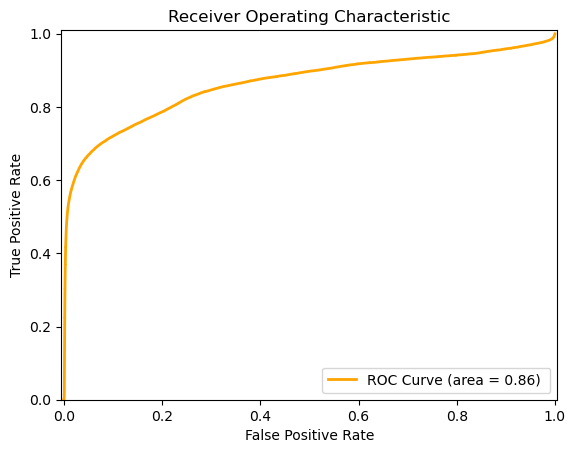

In [25]:
#Estimating the probability of Credit Card Fraud Label
logisticregression_prediction_probability_pca = ccfd_logisticregression_pca.predict_proba(X_Test_pca)

#Calculating true positive rate(tpr) and false positive rate(fpr)
fpr, tpr, thresholds = metrics.roc_curve(y_test_balanced, logisticregression_prediction_probability_pca[:,1], pos_label=1)

#Calculating Area Under Curve
lr_pca_AUC = metrics.auc(lr_fpr, lr_tpr)
print("Area Under Curve for pca variant: ")
print(AUC)

#Plotting graph for ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC Curve (area = %0.2f) ' % AUC)

#Defining range of x and y axes
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Defining labels, title and legend for graph
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right');